## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing data heatmap

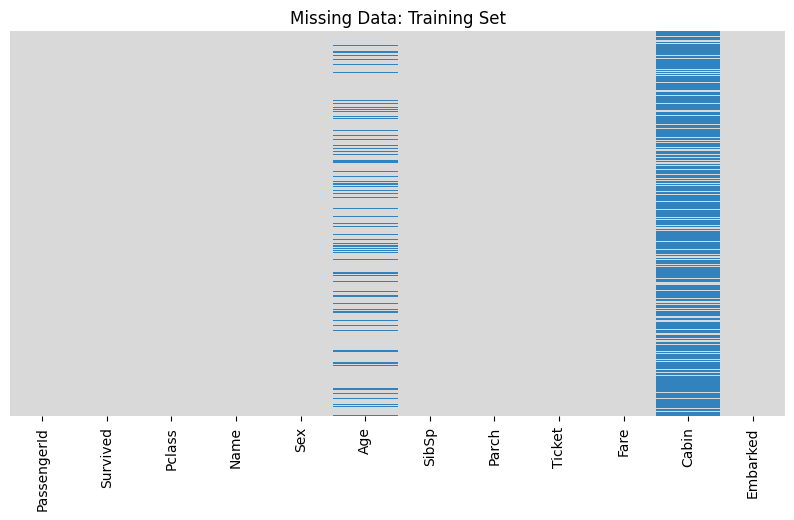

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='tab20c_r')
plt.title("Missing Data: Training Set")
plt.show()

## Dealing with age

Text(0.5, 1.0, 'Age by Passenger Class')

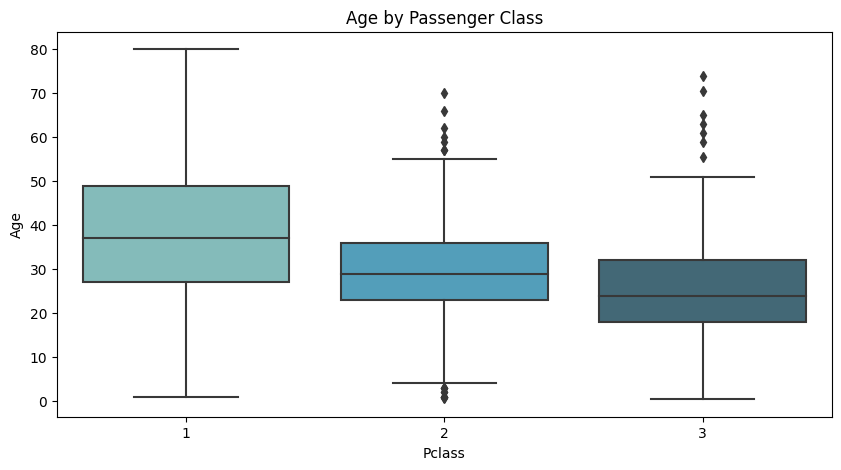

In [ ]:
sns.boxplot(x="Pclass", y="Age", data=df, palette="GnBu_d").set_title('Age by Passenger Class')

## Imputation Function

In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass ==1:
      return 37

    elif Pclass ==2:
      return 29

    else:
      return 24
  else:
    return Age

df['Age']=df[['Age', 'Pclass']].apply(impute_age, axis=1)

## Remove columns

In [ ]:
df.drop(['Cabin','PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Remove rows with missing data

In [ ]:
df.dropna(inplace=True)

## Removing unnecessary columns

In [ ]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

## Convert objects to category type

In [ ]:
obj = ['Sex', 'Embarked']
for col_name in obj:
  df[col_name] = df[col_name].astype('category')

## Numeric data summary(description)

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(889, 8)

## Identify categorical features

In [ ]:
df.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

## Convert categorical variables into dummy or indicator variables

In [ ]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

## Add new dummy data to dataframe

In [ ]:
df = pd.concat([df, sex, embarked], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


## dropping previous columns

In [ ]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df.shape

(889, 9)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Test Train Split

In [ ]:
x = df.drop('Survived', axis=1) #input
y = df['Survived'] #output or target variable

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=101) #random data like shuffling

In [ ]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
307,1,17.0,1,0,108.9000,0,0,0
229,3,24.0,3,1,25.4667,0,0,1
82,3,24.0,0,0,7.7875,0,1,0
353,3,25.0,1,0,17.8000,1,0,1
707,1,42.0,0,0,26.2875,1,0,1
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,0,0,1
840,3,20.0,0,0,7.9250,1,0,1
338,3,45.0,0,0,8.0500,1,0,1
524,3,24.0,0,0,7.2292,1,0,0


In [ ]:
y_train

307    1
229    0
82     1
353    0
707    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 711, dtype: int64

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# create instance of model
lreg = LogisticRegression()

#Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

## Prediction

In [ ]:
# predict
y_predict_lreg = lreg.predict(x_test)
print(y_predict_lreg)
print(y_predict_lreg.shape)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
(178,)


## Probablities of each class

In [ ]:
prob = lreg.predict_proba(x_test)[:,1]
print(prob.shape)
print(prob)

(178,)
[0.10915127 0.17773884 0.74863063 0.92024789 0.17923771 0.04185239
 0.11552158 0.23001998 0.07873819 0.67545481 0.78841017 0.94478461
 0.10913149 0.57761948 0.10933738 0.12252589 0.91641276 0.84248052
 0.54123867 0.09994164 0.10922985 0.0868429  0.42374298 0.34700701
 0.04218935 0.43905695 0.60009198 0.5892852  0.09286304 0.29915605
 0.09259718 0.25428985 0.0122366  0.10595792 0.10908021 0.11023797
 0.75631969 0.06360494 0.12243807 0.13434634 0.53049561 0.137305
 0.11903788 0.92785712 0.61223239 0.12691113 0.61587824 0.86598691
 0.10279812 0.26663971 0.48908488 0.7981049  0.16922781 0.12280859
 0.10902308 0.0718876  0.42735021 0.08616499 0.07421311 0.91080168
 0.67545481 0.93446331 0.88915289 0.08643931 0.13956377 0.04970037
 0.11557597 0.43211761 0.05795062 0.14299847 0.3381727  0.13570575
 0.61976683 0.88748463 0.11184754 0.7294167  0.08099363 0.13570575
 0.1036702  0.29700399 0.2992583  0.37619836 0.4506877  0.12252589
 0.28128942 0.65863248 0.07121188 0.87044956 0.09879186 0

## Probabilities along with the class

In [ ]:
for i in range(len(y_test)):
  print(round(prob[i], 3), "-->", y_predict_lreg[i])

0.109 --> 0
0.178 --> 0
0.749 --> 1
0.92 --> 1
0.179 --> 0
0.042 --> 0
0.116 --> 0
0.23 --> 0
0.079 --> 0
0.675 --> 1
0.788 --> 1
0.945 --> 1
0.109 --> 0
0.578 --> 1
0.109 --> 0
0.123 --> 0
0.916 --> 1
0.842 --> 1
0.541 --> 1
0.1 --> 0
0.109 --> 0
0.087 --> 0
0.424 --> 0
0.347 --> 0
0.042 --> 0
0.439 --> 0
0.6 --> 1
0.589 --> 1
0.093 --> 0
0.299 --> 0
0.093 --> 0
0.254 --> 0
0.012 --> 0
0.106 --> 0
0.109 --> 0
0.11 --> 0
0.756 --> 1
0.064 --> 0
0.122 --> 0
0.134 --> 0
0.53 --> 1
0.137 --> 0
0.119 --> 0
0.928 --> 1
0.612 --> 1
0.127 --> 0
0.616 --> 1
0.866 --> 1
0.103 --> 0
0.267 --> 0
0.489 --> 0
0.798 --> 1
0.169 --> 0
0.123 --> 0
0.109 --> 0
0.072 --> 0
0.427 --> 0
0.086 --> 0
0.074 --> 0
0.911 --> 1
0.675 --> 1
0.934 --> 1
0.889 --> 1
0.086 --> 0
0.14 --> 0
0.05 --> 0
0.116 --> 0
0.432 --> 0
0.058 --> 0
0.143 --> 0
0.338 --> 0
0.136 --> 0
0.62 --> 1
0.887 --> 1
0.112 --> 0
0.729 --> 1
0.081 --> 0
0.136 --> 0
0.104 --> 0
0.297 --> 0
0.299 --> 0
0.376 --> 0
0.451 --> 0
0.123 --> 0
0.2

## Score it (Accuracy for only classification)


## Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
logreg_accuracy = round(accuracy_score(y_test, y_predict_lreg) * 100, 2)

print("Accuracy: ", logreg_accuracy,'%')

Accuracy:  82.02 %


## Confusion Matrix - Precision and Recall

Precision: 0.85
Recall: 0.66


<Axes: >

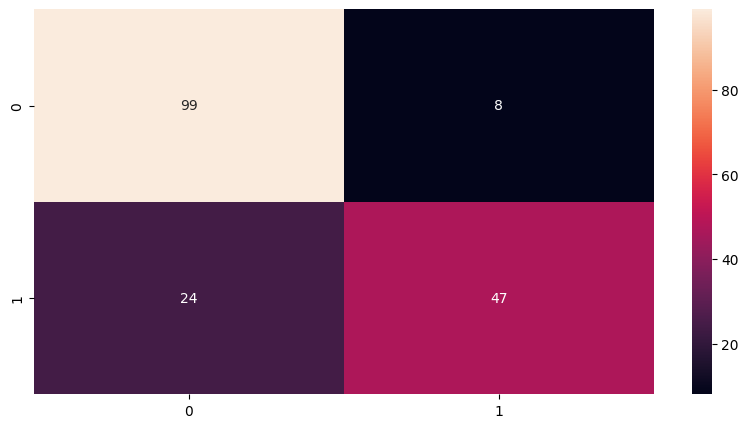

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# calculate precision and recall
precision = precision_score(y_test, y_predict_lreg)
recall = recall_score(y_test, y_predict_lreg)

# printing the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predict_lreg)
sns.heatmap(confusion, annot=True, fmt="d")

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print("Decision Tree Classifier")
Dt = DecisionTreeClassifier()
Dt.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_Dt = Dt.predict(x_test)
Dt_acc = round(accuracy_score(y_test, y_pred_Dt)*100, 2)
print("Accuracy: ", Dt_acc,"%")

Accuracy:  80.34 %


## Confusion Matrix - Precision and Recall

Precision: 0.74
Recall: 0.79


<Axes: >

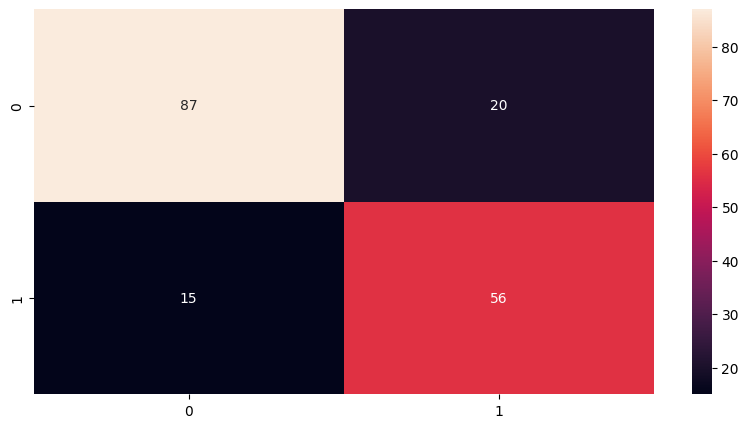

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# calculate precision and recall
precision = precision_score(y_test, y_pred_Dt)
recall = recall_score(y_test, y_pred_Dt)

# printing the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dt)
sns.heatmap(confusion, annot=True, fmt="d")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("Random Forest Classifier")
Rf = RandomForestClassifier()
Rf.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [ ]:
y_pred_Rf = Rf.predict(x_test)
Rf_acc = round(accuracy_score(y_test, y_pred_Rf)*100, 2)
print("Accuracy: ", Rf_acc,"%")

Accuracy:  82.02 %


## Confusion Matrix - Precision and Recall

Precision: 0.79
Recall: 0.75


<Axes: >

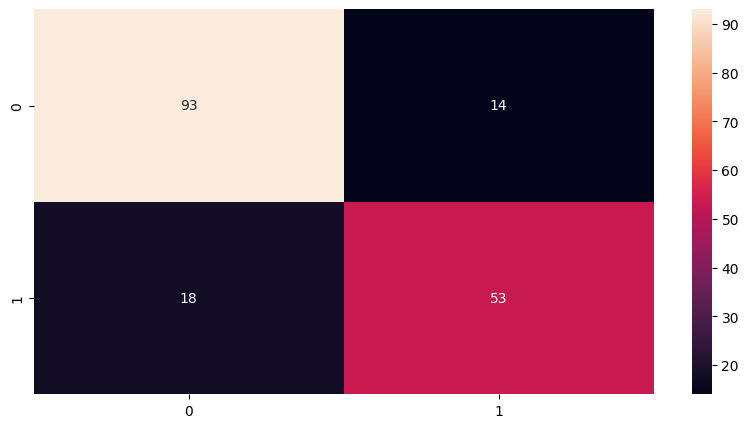

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# calculate precision and recall
precision = precision_score(y_test, y_pred_Rf)
recall = recall_score(y_test, y_pred_Rf)

# printing the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_Rf)
sns.heatmap(confusion, annot=True, fmt="d")

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

print("Gradient Boosting Classifier")
Gb = GradientBoostingClassifier()
Gb.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

In [ ]:
y_pred_Gb = Gb.predict(x_test)
Gb_acc = round(accuracy_score(y_test, y_pred_Gb)*100, 2)
print("Accuracy: ", Gb_acc,"%")

Accuracy:  84.27 %


## Confusion Matrix - Precision and Recall

Precision: 0.83
Recall: 0.76


<Axes: >

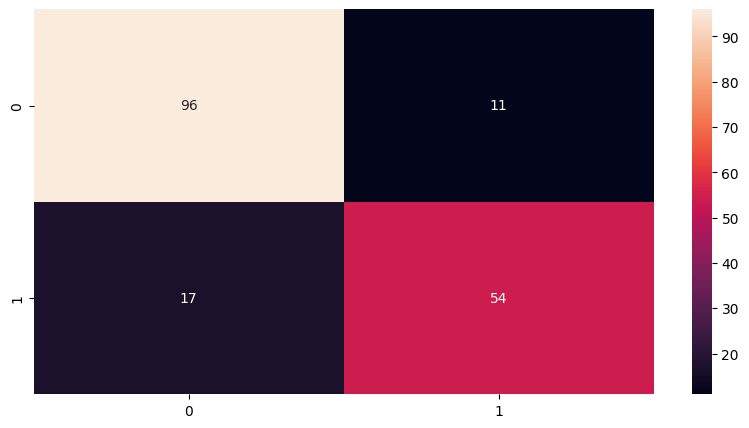

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# calculate precision and recall
precision = precision_score(y_test, y_pred_Gb)
recall = recall_score(y_test, y_pred_Gb)

# printing the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_Gb)
sns.heatmap(confusion, annot=True, fmt="d")

## Models Accuracy

In [ ]:
model_scores = {
    "Logistic Regression": 82.02,
    "Decision Tree": 79.21,
    "Random Forest": 82.58,
    "Gradient Boosting": 84.27
}

# sorted scores
sorted_scores = sorted(model_scores.items(), key=lambda x:x[1], reverse=True)

# display the ranking of the model
print("Model rankings:")
print("****************************")

for rank, (model_name, score) in enumerate(sorted_scores, start=1):
  print(f"{rank}. {model_name}: {score}")

Model rankings:
****************************
1. Gradient Boosting: 84.27
2. Random Forest: 82.58
3. Logistic Regression: 82.02
4. Decision Tree: 79.21


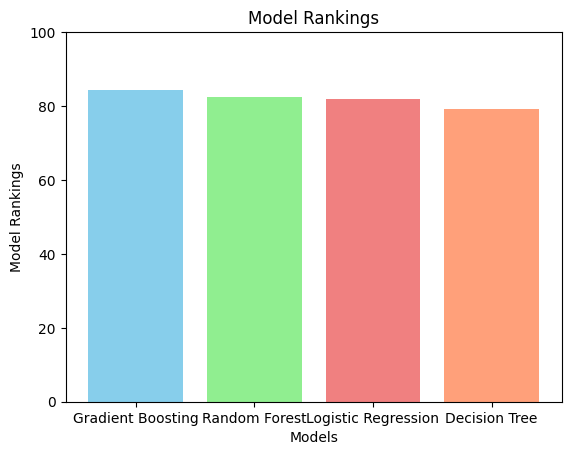

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_rankings = {
    "Gradient Boosting": 84.27,
    "Random Forest": 82.58,
    "Logistic Regression": 82.02,
    "Decision Tree": 79.21
}

# Sorted rankings
sorted_rankings = sorted(model_rankings.items(), key=lambda x: x[1], reverse=True)

# Extracting model names and scores for plotting
model_names, scores = zip(*sorted_rankings)

# Define custom colors for each bar
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Bar plot with different colors for each bar
plt.bar(model_names, scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Model Rankings')
plt.title('Model Rankings')
plt.ylim(0, 100)  # Optional: Set y-axis limit for better visualization
plt.show()
